## Random Forest 

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

data = pd.read_csv("Fully_Encoded.csv", header=0)


In [37]:
#test that the data came in and looks like I want it to
data.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,10919.0,26.0,2006.0,10.0,361.0,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,77.000000,322.000000,1008.000000,1.000000
1,9265.0,11.0,1985.0,4.0,361.0,29.08,3.58,6.81,0.77,40.24,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
2,5534.0,26.0,2008.0,6.0,361.0,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,80.000000,709.000000,1008.000000,1.000000
3,10921.0,26.0,2009.0,10.0,361.0,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,77.000000,192.000000,1008.000000,1.000000
4,7294.0,5.0,1996.0,7.0,361.0,11.27,8.89,10.22,1.00,31.37,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
5,9646.0,5.0,1989.0,5.0,361.0,23.20,2.26,4.22,0.58,30.26,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
6,6677.0,4.0,2006.0,4.0,361.0,11.28,9.14,6.50,2.88,29.80,89.000000,65.000000,82.000000,431.000000,1008.000000,1.000000
7,10917.0,26.0,2006.0,3.0,361.0,13.96,9.18,2.93,2.84,28.92,58.000000,41.000000,63.000000,129.000000,1008.000000,1.000000
8,6680.0,26.0,2009.0,4.0,361.0,14.44,6.94,4.70,2.24,28.32,87.000000,80.000000,81.000000,594.000000,1008.000000,1.000000
9,2566.0,11.0,1984.0,8.0,361.0,26.93,0.63,0.28,0.47,28.31,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16416 entries, 0 to 16415
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  float64
 1   Platform         16416 non-null  float64
 2   Year_of_Release  16416 non-null  float64
 3   Genre            16416 non-null  float64
 4   Publisher        16416 non-null  float64
 5   NA_Sales         16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   JP_Sales         16416 non-null  float64
 8   Other_Sales      16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
 10  Critic_Score     16416 non-null  float64
 11  Critic_Count     16416 non-null  float64
 12  User_Score       16416 non-null  float64
 13  User_Count       16416 non-null  float64
 14  Developer        16416 non-null  float64
 15  Rating           16416 non-null  float64
dtypes: float64(16)
memory usage: 2.0 MB


In [39]:
#Before going further I decided to slice out just the columns I will need to make it a little easier to work with
#data = data[['pclass', 'sex', 'age','sibsp','survived']] 
#data.head(10)

In [40]:
data.head(10)



,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,10919.0,26.0,2006.0,10.0,361.0,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,77.000000,322.000000,1008.000000,1.000000
1,9265.0,11.0,1985.0,4.0,361.0,29.08,3.58,6.81,0.77,40.24,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
2,5534.0,26.0,2008.0,6.0,361.0,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,80.000000,709.000000,1008.000000,1.000000
3,10921.0,26.0,2009.0,10.0,361.0,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,77.000000,192.000000,1008.000000,1.000000
4,7294.0,5.0,1996.0,7.0,361.0,11.27,8.89,10.22,1.00,31.37,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
5,9646.0,5.0,1989.0,5.0,361.0,23.20,2.26,4.22,0.58,30.26,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
6,6677.0,4.0,2006.0,4.0,361.0,11.28,9.14,6.50,2.88,29.80,89.000000,65.000000,82.000000,431.000000,1008.000000,1.000000
7,10917.0,26.0,2006.0,3.0,361.0,13.96,9.18,2.93,2.84,28.92,58.000000,41.000000,63.000000,129.000000,1008.000000,1.000000
8,6680.0,26.0,2009.0,4.0,361.0,14.44,6.94,4.70,2.24,28.32,87.000000,80.000000,81.000000,594.000000,1008.000000,1.000000
9,2566.0,11.0,1984.0,8.0,361.0,26.93,0.63,0.28,0.47,28.31,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616


In [73]:
#using scikit I will split the data into test and train sets
#I found this function at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
x = data[['Name', 'Platform', 'Year_of_Release','Genre','Publisher','Critic_Score','User_Score','User_Count','Developer','Rating']] 
y = data[['NA_Sales','JP_Sales', 'Other_Sales','EU_Sales','Global_Sales']]



In [74]:
x.head()

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,User_Score,User_Count,Developer,Rating
0,10919.0,26.0,2006.0,10.0,361.0,76.000000,77.000000,322.000000,1008.000000,1.000000
1,9265.0,11.0,1985.0,4.0,361.0,68.997119,74.727254,163.008846,835.050081,3.558616
2,5534.0,26.0,2008.0,6.0,361.0,82.000000,80.000000,709.000000,1008.000000,1.000000
3,10921.0,26.0,2009.0,10.0,361.0,80.000000,77.000000,192.000000,1008.000000,1.000000
4,7294.0,5.0,1996.0,7.0,361.0,68.997119,74.727254,163.008846,835.050081,3.558616


In [75]:
y.head()

,NA_Sales,JP_Sales,Other_Sales,EU_Sales,Global_Sales
0,41.36,3.77,8.45,28.96,82.53
1,29.08,6.81,0.77,3.58,40.24
2,15.68,3.79,3.29,12.76,35.52
3,15.61,3.28,2.95,10.93,32.77
4,11.27,10.22,1.00,8.89,31.37


In [76]:
data['NA_Sales'].describe()

count    16416.000000
mean         0.264129
std          0.819028
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: NA_Sales, dtype: float64

<AxesSubplot:xlabel='Global Sales', ylabel='Count'>

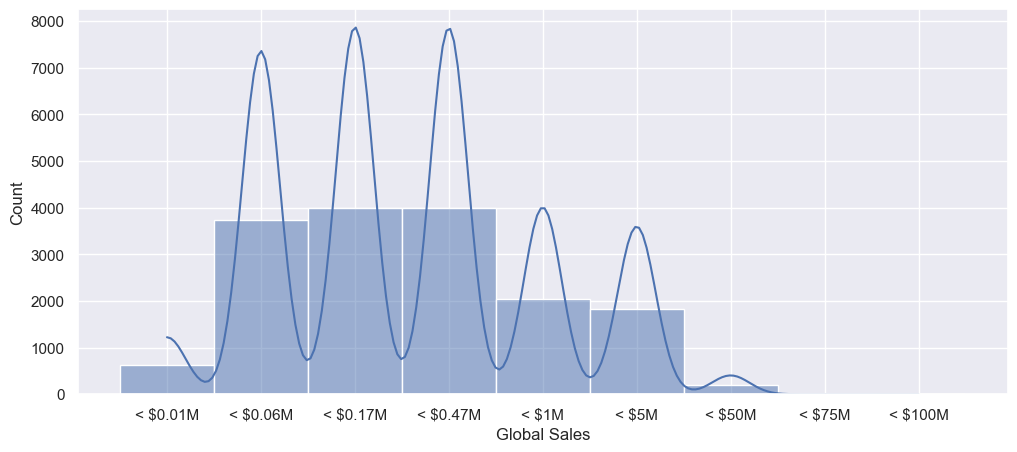

In [67]:
'''bin_sales = [0,.01,.06,.17,.47,1,5,50,75,100]
#bin_sales = [0,.5,1,5,10,20,50,75,100]
y = data['Global_Sales']
bin_labels = [f"< ${c}M" for c in bin_sales][1:] 
y = pd.cut(y, bins = bin_sales, labels = bin_labels)
y_var = pd.Series(y, name = "Global Sales")

sns.set(rc={"figure.figsize":(12, 5)})

sns.histplot(data = y_var, kde=True)'''

In [77]:
bin_sales_NA = [float('-inf'),0, 0.001, 0.5,0.6,0.8,2,5,10,100]
bin_sales_EU = [float('-inf'),0, 0.001, 0.5,0.6,0.8,2,5,10,100]
bin_sales_Other = [float('-inf'),0, 0.001, 0.5,0.6,0.8,2,5,10,100]
bin_sales_Global = [float('-inf'),0, 0.001, 0.5,0.6,0.8,2,5,10,100]
bin_sales_JP = [float('-inf'),0, 0.001, 0.01,0.06,0.1,.5,10,100]

print(data['Global_Sales'])

0        82.53
1        40.24
2        35.52
3        32.77
4        31.37
         ...  
16411     0.01
16412     0.01
16413     0.01
16414     0.01
16415     0.01
Name: Global_Sales, Length: 16416, dtype: float64


In [170]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=10)

bin_labels_NA = [f"< ${c}M" for c in bin_sales_NA][1:]
bin_labels_JP = [f"< ${c}M" for c in bin_sales_JP][1:]
bin_labels_EU = [f"< ${c}M" for c in bin_sales_EU][1:]
bin_labels_Other = [f"< ${c}M" for c in bin_sales_Other][1:]
bin_labels_Global = [f"< ${c}M" for c in bin_sales_Global][1:]

y_train_NA = pd.cut(y_train['NA_Sales'], bins = bin_sales_NA, labels = bin_labels_NA)
y_train_JP = pd.cut(y_train['JP_Sales'], bins = bin_sales_JP, labels = bin_labels_JP)
y_train_EU = pd.cut(y_train['EU_Sales'], bins = bin_sales_EU, labels = bin_labels_EU)
y_train_Other = pd.cut(y_train['Other_Sales'], bins = bin_sales_Other, labels = bin_labels_Other)
y_train_Global = pd.cut(y_train['Global_Sales'], bins = bin_sales_Global, labels = bin_labels_Global)

y_test_NA = pd.cut(y_test['NA_Sales'], bins = bin_sales_NA, labels = bin_labels_NA)
y_test_JP = pd.cut(y_test['JP_Sales'], bins = bin_sales_JP, labels = bin_labels_JP)
y_test_EU = pd.cut(y_test['EU_Sales'], bins = bin_sales_EU, labels = bin_labels_EU)
y_test_Other = pd.cut(y_test['Other_Sales'], bins = bin_sales_Other, labels = bin_labels_Other)
y_test_Global = pd.cut(y_test['Global_Sales'], bins = bin_sales_Global, labels = bin_labels_Global)



In [171]:
  #check to make sure we have a 80/20 split
print("x_train size: " + str(len(x_train)) + "  x_test size: " + str(len(x_test)))
print("y_train size: " + str(len(y_train)) + "  y_test size: " + str(len(y_test)))

x_train size: 14774  x_test size: 1642
y_train size: 14774  y_test size: 1642


I now want to make sure this function gave me the correct split and left the same samples associated with the correct indices, and it looks like it did.

In [172]:
print(y_train)

       NA_Sales  JP_Sales  Other_Sales  EU_Sales  Global_Sales
10447      0.08      0.00         0.00      0.02          0.10
3224       0.56      0.00         0.05      0.00          0.61
12121      0.06      0.00         0.00      0.00          0.06
8338       0.12      0.00         0.00      0.04          0.16
5693       0.00      0.29         0.02      0.00          0.31
...         ...       ...          ...       ...           ...
4829       0.29      0.00         0.01      0.08          0.39
10201      0.06      0.00         0.01      0.04          0.11
9372       0.00      0.13         0.00      0.00          0.13
7291       0.11      0.00         0.03      0.07          0.21
7293       0.00      0.20         0.01      0.00          0.21

[14774 rows x 5 columns]


In [173]:
print(x_train)

         Name  Platform  Year_of_Release  Genre  Publisher  Critic_Score  \
10447  4485.0      10.0           1998.0    3.0      186.0     68.997119   
3224   6302.0      17.0           2008.0   10.0      496.0     82.000000   
12121  6209.0       4.0           2008.0    9.0      466.0     60.000000   
8338   7061.0       6.0           2006.0    9.0      490.0     68.997119   
5693   3127.0      15.0           1997.0    9.0      468.0     68.997119   
...       ...       ...              ...    ...        ...           ...   
4829   8142.0      29.0           2003.0   10.0      139.0     92.000000   
10201  2129.0      15.0           1999.0   11.0      349.0     51.000000   
9372   4592.0      16.0           2005.0    3.0      447.0     68.997119   
7291   3373.0      17.0           2009.0    0.0      139.0     43.000000   
7293   2974.0       6.0           2004.0    4.0      277.0     68.997119   

       User_Score  User_Count    Developer    Rating  
10447   74.727254  163.008846   

In [174]:
from sklearn.model_selection import GridSearchCV

parameter = {'max_leaf_nodes':range(2,100)}
pruned_tree_NA = GridSearchCV(tree.DecisionTreeClassifier(),parameter)
pruned_tree_NA.fit(x_train, y_train_NA)
print("best parameters: ", pruned_tree_NA.best_params_)

best parameters:  {'max_leaf_nodes': 99}


In [175]:
parameter = {'max_leaf_nodes':range(2,100)}
pruned_tree_JP = GridSearchCV(tree.DecisionTreeClassifier(),parameter)
pruned_tree_JP.fit(x_train, y_train_JP)
print("best parameters: ", pruned_tree_JP.best_params_)

C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best parameters:  {'max_leaf_nodes': 97}


In [176]:
parameter = {'max_leaf_nodes':range(2,100)}
pruned_tree_EU = GridSearchCV(tree.DecisionTreeClassifier(),parameter)
pruned_tree_EU.fit(x_train, y_train_EU)
print("best parameters: ", pruned_tree_EU.best_params_)

C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


best parameters:  {'max_leaf_nodes': 91}


In [177]:
parameter = {'max_leaf_nodes':range(2,100)}
pruned_tree_Other = GridSearchCV(tree.DecisionTreeClassifier(),parameter)
pruned_tree_Other.fit(x_train, y_train_Other)
print("best parameters: ", pruned_tree_Other.best_params_)

C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best parameters:  {'max_leaf_nodes': 66}


In [178]:
parameter = {'max_leaf_nodes':range(2,100)}
pruned_tree_Global = GridSearchCV(tree.DecisionTreeClassifier(),parameter)
pruned_tree_Global.fit(x_train, y_train_Global)
print("best parameters: ", pruned_tree_Global.best_params_)

best parameters:  {'max_leaf_nodes': 50}


Random Forest for NA sales

In [179]:
random_NA = RandomForestClassifier(max_leaf_nodes = 120, n_estimators = 50)
random_NA.fit(x_train, y_train_NA.values.ravel())  #Use ravel to format the values and avoid warning found at https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected

RandomForestClassifier(max_leaf_nodes=120, n_estimators=50)

In [180]:
NA_prediction = random_NA.predict(x_test)

In [181]:
print(random_NA.score(x_test,y_test_NA))

0.7807551766138855


Random Forest JP

In [182]:
random_JP = RandomForestClassifier(max_leaf_nodes = 120, n_estimators = 50)
random_JP.fit(x_train, y_train_JP.values.ravel())

RandomForestClassifier(max_leaf_nodes=120, n_estimators=50)

In [183]:
JP_prediction = random_JP.predict(x_test)
print(random_JP.score(x_test,y_test_JP))

0.7174177831912302


Random Forest EU

In [184]:
random_EU = RandomForestClassifier(max_leaf_nodes = 120, n_estimators = 50)
random_EU.fit(x_train, y_train_EU.values.ravel())

RandomForestClassifier(max_leaf_nodes=120, n_estimators=50)

In [185]:
EU_prediction = random_EU.predict(x_test)
print(random_EU.score(x_test,y_test_EU))

0.7838002436053593


Random Forest Other

In [186]:
random_Other = RandomForestClassifier(max_leaf_nodes = 120, n_estimators = 50)
random_Other.fit(x_train, y_train_Other.values.ravel())

RandomForestClassifier(max_leaf_nodes=120, n_estimators=50)

In [187]:
Other_prediction = random_Other.predict(x_test)
print(random_Other.score(x_test,y_test_Other))

0.7941534713763703


Random Forest Global

In [197]:
random_Global = RandomForestClassifier(max_leaf_nodes = 120, n_estimators = 50)
random_Global.fit(x_train, y_train_Global.values.ravel())

RandomForestClassifier(max_leaf_nodes=120, n_estimators=50)

In [198]:
Global_prediction = random_Global.predict(x_test)
print(random_Global.score(x_test,y_test_Global))

0.7904993909866017


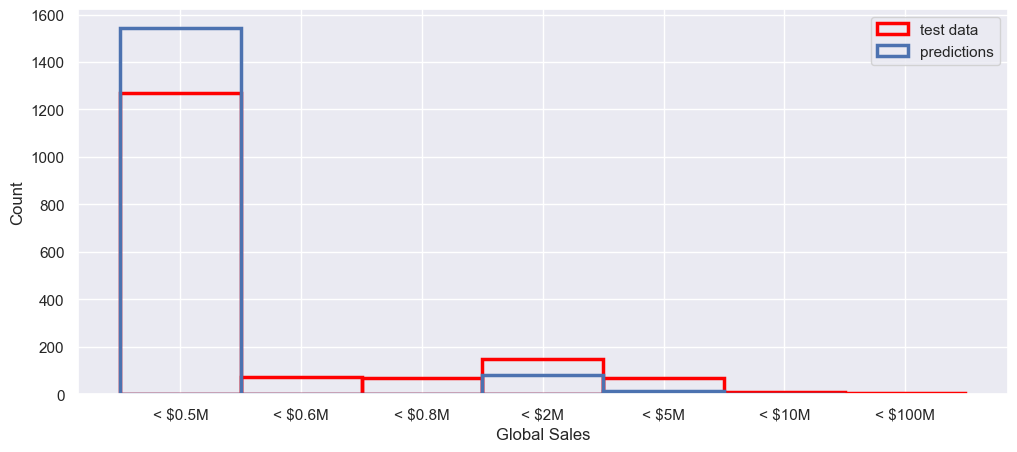

In [207]:
import matplotlib.pylab as plt

#global sales
bin_labels = [f"< ${c}M" for c in bin_sales_Global][1:] 

y_Global_test = pd.Series(y_test_Global, name = "Global Sales")
y_Global_p = pd.Series(Global_prediction, name = "prediction")

plt.figure("Global Sales")
sns.set(rc={"figure.figsize":(12, 5)})
sns.histplot(data = y_Global_test,  fill=False, color = 'red', lw=2.5, stat = "count", label = "test data")
sns.histplot(data = y_Global_p,  fill=False, stat = "count", lw=2.5, label = "predictions")
plt.legend()





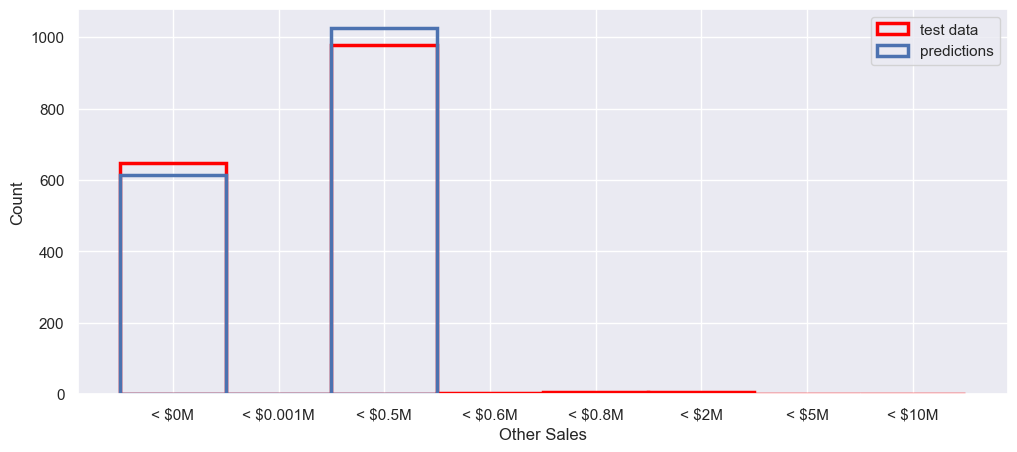

In [200]:
bin_labels = [f"< ${c}M" for c in bin_sales_Other][1:] 

y_Other_test = pd.Series(y_test_Other, name = "Other Sales")
y_Other_p = pd.Series(Other_prediction, name = "prediction")

plt.figure("Other Sales")
sns.set(rc={"figure.figsize":(12, 5)})
sns.histplot(data = y_Other_test,  fill=False, color = 'red', lw=2.5, stat = "count", label = "test data")
sns.histplot(data = y_Other_p,  fill=False, stat = "count", lw=2.5, label = "predictions")
plt.legend()


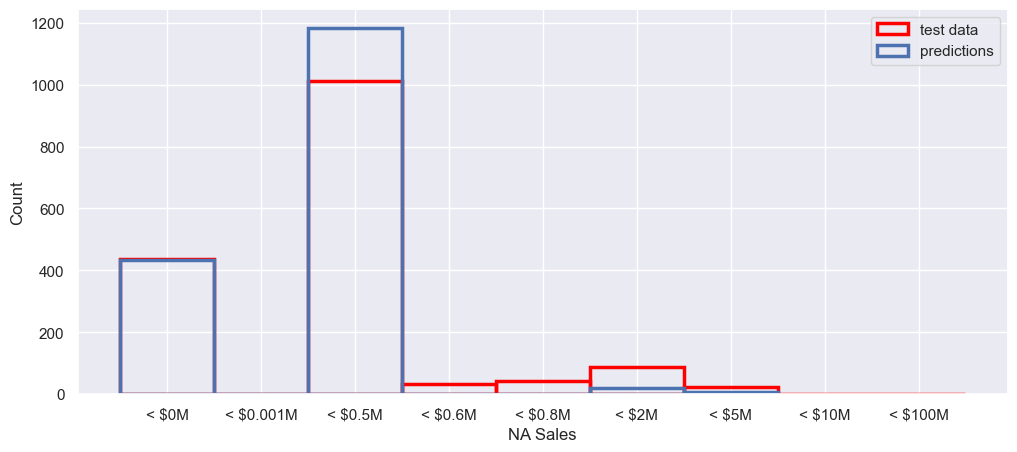

In [205]:
bin_labels = [f"< ${c}M" for c in bin_sales_NA][1:] 

y_NA_test = pd.Series(y_test_NA, name = "NA Sales")
y_NA_p = pd.Series(NA_prediction, name = "prediction")

plt.figure("NA Sales")
sns.set(rc={"figure.figsize":(12, 5)})
sns.histplot(data = y_NA_test,  fill=False, color = 'red', lw=2.5, stat = "count", label = "test data")
sns.histplot(data = y_NA_p,  fill=False, stat = "count", lw=2.5, label = "predictions")
plt.legend()



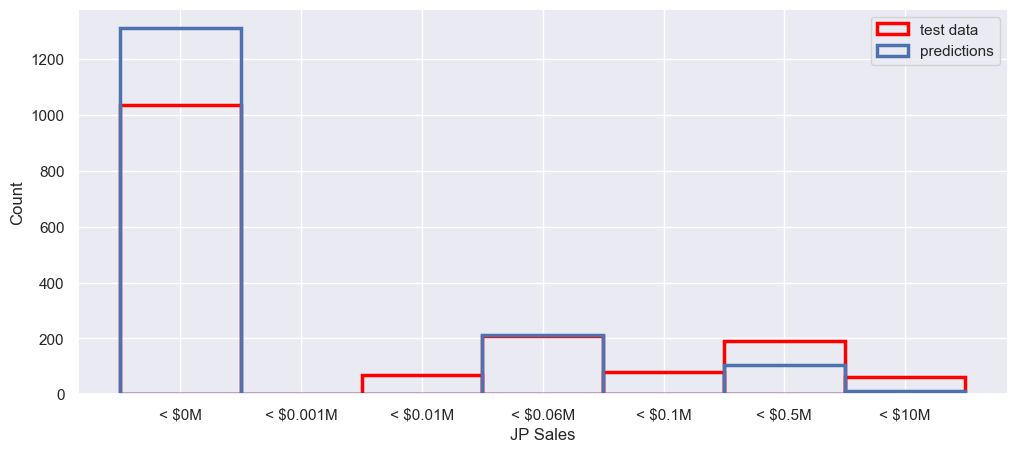

In [202]:
bin_labels = [f"< ${c}M" for c in bin_sales_JP][1:] 

y_JP_test = pd.Series(y_test_JP, name = "JP Sales")
y_JP_p = pd.Series(JP_prediction, name = "prediction")

plt.figure("JP Sales")
sns.set(rc={"figure.figsize":(12, 5)})
sns.histplot(data = y_JP_test,  fill=False, color = 'red', lw=2.5, stat = "count", label = "test data")
sns.histplot(data = y_JP_p,  fill=False, stat = "count", lw=2.5, label = "predictions")
plt.legend()


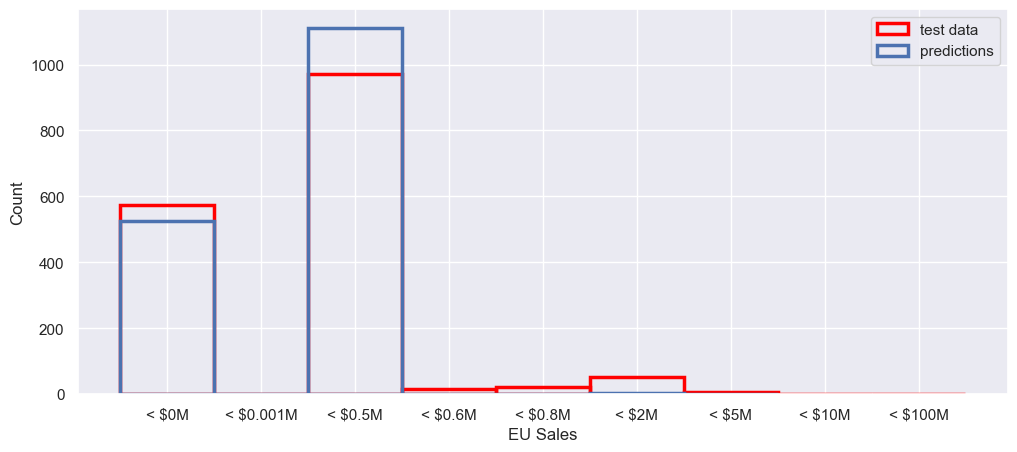

In [203]:
bin_labels = [f"< ${c}M" for c in bin_sales_EU][1:] 

y_EU_test = pd.Series(y_test_EU, name = "EU Sales")
y_EU_p = pd.Series(EU_prediction, name = "prediction")

plt.figure("EU Sales")
sns.set(rc={"figure.figsize":(12, 5)})
sns.histplot(data = y_EU_test,  fill=False, color = 'red', lw=2.5, stat = "count", label = "test data")
sns.histplot(data = y_EU_p,  fill=False, stat = "count", lw=2.5, label = "predictions")
plt.legend()
